# Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Model Inference harus berada pada notebook yang berbeda dari notebook yang dipakai untuk pembuatan model.

In [4]:
import os
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from sklearn.metrics import classification_report, confusion_matrix

print('Berhasil Mengimport Libraries')

Berhasil Mengimport Libraries


1/1 [==============================] - 0s 181ms/step


2023-12-18 22:18:12.944219: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


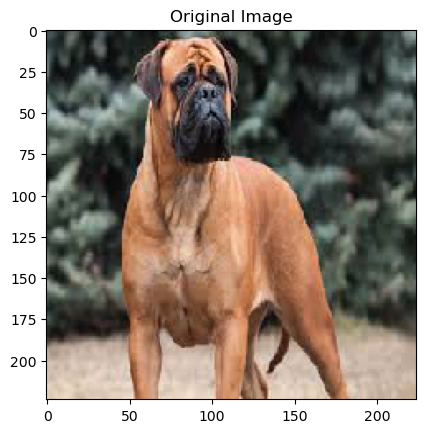

Prediction is a dogs


In [5]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image

loaded_model = load_model('model1.h5')

img_path = 'anjing.jpeg'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224, 3))  
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

predictions1 = loaded_model.predict(img_array)

model_pred_final = np.where(predictions1 >= 0.45, 1, 0)

plt.imshow(img)
plt.title('Original Image')
plt.show()

print('Prediction is a {}'.format('dogs' if model_pred_final[0][0] == 0 else 'cats'))

In [7]:
predictions1

array([[0.40140167]], dtype=float32)

1/1 [==============================] - 0s 165ms/step


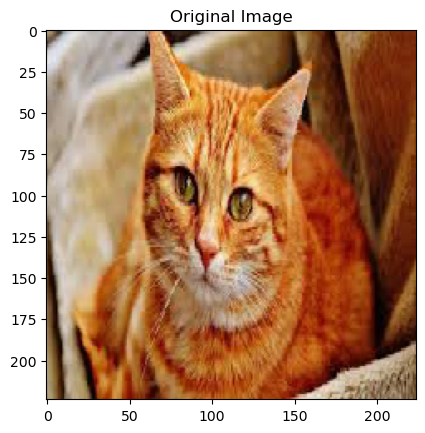

Prediction is a cats


In [8]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image

loaded_model = load_model('model1.h5')

img_path = 'kucing.jpeg'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224, 3))  
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

predictions2 = loaded_model.predict(img_array)

model_pred_final = np.where(predictions2 >= 0.45, 1, 0)

plt.imshow(img)
plt.title('Original Image')
plt.show()

print('Prediction is a {}'.format('cats' if model_pred_final[0][0] == 0 else 'dogs'))

In [9]:
predictions2

array([[0.23573221]], dtype=float32)

1/1 [==============================] - 0s 122ms/step
Prediction is a anjing


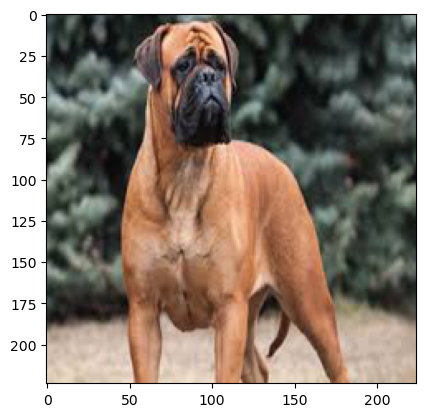

In [10]:
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKS2n8o1_w7Ejbw4HxP_70l7V7QS2X2QMgAw&usqp=CAU'
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
target_size=(224, 224)
img = img.resize(target_size)
img_array = tf.keras.utils.img_to_array(img)
img_array = img_array / 255.0 
plt.imshow(img_array)
input_image = np.expand_dims(img_array, axis=0)
classes = loaded_model.predict(input_image)
idx = np.where(classes >= 0.5, 1, 0).item()
label = ['anjing','kucing']
print('Prediction is a {}'.format(label[idx]))
